<a href="https://colab.research.google.com/github/joaochenriques/AERO1_2021_2022/blob/main/Joukowski_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from numpy import *
import matplotlib.pyplot as mpl
from IPython.display import display, Math
%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (5, 5)

In [2]:
ii = 1J
𝜋 = pi
n = 100 # points per side
θ = linspace( 0, 2*𝜋, 2*n-1 )

In [3]:
def draw_grid():
  mpl.axis('equal')
  mpl.axhline(y= 0,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x= 0,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x= 1,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x=-1,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x=-2,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x= 2,lw=1,dashes=(5,2),color='0.5')

def deg2rad( a ):
  return a * 𝜋 / 180.0

## **Joukowsky airfoil** 

$\Delta r$ - displacement in the real axis

$\Delta i$ - displacement in the imag axis

$a$ - circle radius

$c$ - circle center

$\zeta$ - circle coordinates in the $(\xi,\eta)$ plane

$z$ - Joukowsky airfoil coordinates in the $(x,y)$ plane

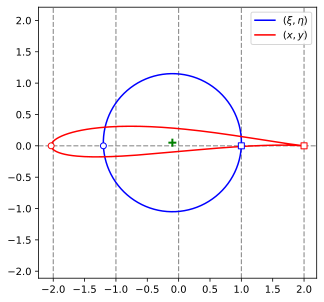

In [37]:
Δr = -0.1
Δi =  0.05

R = sqrt( (1.0-Δr)**2 + Δi**2 )
c = complex( Δr, Δi )
ζ = R * exp( ii*θ ) + c
zs = ζ + 1.0 / ζ

draw_grid()

mpl.plot( real(ζ), imag(ζ),'b', label=r'$(\xi,\eta)$')
mpl.plot( real(zs), imag(zs),'r', label=r'$(x,y)$')

# LE and TE points
ζe = array( ( complex(-1+2*Δr,0), complex(1,0) ) )
ze = ζe + 1.0 / ζe
mpl.plot( real(ζe[0]), imag(ζe[0]),'bo', fillstyle='none', markersize=6, markerfacecolor='w')
mpl.plot( real(ze[0]), imag(ze[0]),'ro', fillstyle='none', markersize=6, markerfacecolor='w')
mpl.plot( real(ζe[1]), imag(ζe[1]),'bs', fillstyle='none', markersize=6, markerfacecolor='w')
mpl.plot( real(ze[1]), imag(ze[1]),'rs', fillstyle='none', markersize=6, markerfacecolor='w')
# circle center
mpl.plot( real(c), imag(c),'g+', markersize=8, markeredgewidth=2)

mpl.legend();

airfoil = copy(zs)
chord = real( ζe[1]-ζe[0] )

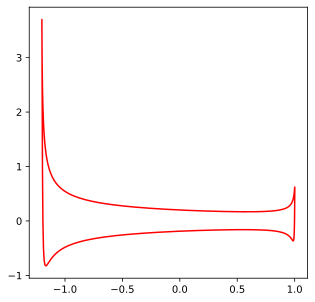

In [40]:
ζ0 = R * exp( -ii*θ ) + c

dWζ0 = exp( -ii*α ) - exp( ii*α ) * R**2 / ζ0**2 + Γ * ii / ( 2 * 𝜋 * ζ0 )
dfζ0 = 1.0 - R**2 / ζ0**2

Uz = dWζ0 / dfζ0
Cp = 1.0 - abs( Uz )**2

mpl.plot( real(ζ), -Cp,'r-', label=r'$(x,y)$');